In [2]:
'''
Applied Microeconometrics Final
Max Marcussen
'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.sandbox.regression.gmm import IV2SLS
from rdd import rdd
import seaborn
from numpy.polynomial.polynomial import polyfit

In [82]:
'''
Reading in data. 
'''
analysis1 = pd.read_stata(r'C:\Users\maxma\Downloads\analysis1.dta')

analysis1['constant']=1


In [5]:
'''
Creating data for IV's
'''
dfiv1 = analysis1[analysis1['year']==1920]
'''
countyFE = pd.get_dummies(dfiv1, columns='lpop1865')
countyFE
'''

"\ncountyFE = pd.get_dummies(dfiv1, columns='lpop1865')\ncountyFE\n"

In [6]:
'''
Creating county fixed effect dummies.
'''
dfiv1
countydum = pd.get_dummies(dfiv1, columns=['c_id'])
FE = list(countydum.columns[len(dfiv1.columns)-1:])
FE

['c_id_Blekinge',
 'c_id_Elfsborgs',
 'c_id_Gefleborgs',
 'c_id_Goteborgs och Bohus',
 'c_id_Gotlands',
 'c_id_Hallands',
 'c_id_Jemtlands',
 'c_id_Jonkopings',
 'c_id_Kalmar',
 'c_id_Kopparbergs',
 'c_id_Kristianstads',
 'c_id_Kronobergs',
 'c_id_Malmohus',
 'c_id_Norrbottens',
 'c_id_Orebro',
 'c_id_Ostergotlands',
 'c_id_Skaraborgs',
 'c_id_Sodermanlands',
 'c_id_Stockholms',
 'c_id_Uppsala',
 'c_id_Vermlands',
 'c_id_Vesterbottens',
 'c_id_Vesternorrlands',
 'c_id_Vestmanlands']

In [68]:
'''
Replicating IV's / doing 1st stage OLS. The original paper limited year to 1920 as well. 
This replicates table 2 from the paper.
'''

y = 'emi67t'
control = ['larea', 'arableshare1810', 'lproxport10', 'lproxtown', 'lproxsthlm', 'lproxrail', 'lproxstnfrost', 'latitude', 'longitude', 'barley_hi', 'oats_hi', 'wheat_hi', 'dairy_hi', 'forest1907_hi']
spec1 = ['constant', 'shockport', 'shock', 'lproxemiport', 'lpop1865'] + FE
spec2 = ['constant', 'shockport', 'shock', 'lproxemiport', 'lpop1865'] + control + FE
spec3 = ['constant', 'shockport', 'shock', 'lproxemiport', 'lpop1865', 'shockport10', 'shocktown'] + control + FE
spec4 = ['constant', 'shockport', 'shock', 'lproxemiport', 'lpop1865', 'shockport10', 'shocktown', 'shockportngs', 'shockngs'] + control + FE

reg1 = sm.OLS(countydum[y], countydum[spec1], missing='drop').fit(cov_type='cluster', cov_kwds={'groups': countydum['stnfrost']})
reg2 = sm.OLS(countydum[y], countydum[spec2], missing='drop').fit(cov_type='cluster', cov_kwds={'groups': countydum['stnfrost']})
reg3 = sm.OLS(countydum[y], countydum[spec3], missing='drop').fit(cov_type='cluster', cov_kwds={'groups': countydum['stnfrost']})
reg4 = sm.OLS(countydum[y], countydum[spec4], missing='drop').fit(cov_type='cluster', cov_kwds={'groups': countydum['stnfrost']})
reg5 = sm.OLS(countydum[y], countydum[['constant', 'shockport']], missing='drop').fit(cov_type='cluster', cov_kwds={'groups': countydum['stnfrost']})
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3,reg4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['1', '2: including local controls', '3: controls for market access', '4: includes nongrowing season frost shocks', '5: only instrument'],
                            info_dict=info_dict,
                            regressor_order=['constant',
                                             'shockport',
                                             'shock',
                                             'lproxemiport',
                                             'lpop1865',
                                             'shockport10',
                                             'shocktown',
                                             'shockportngs',
                                             'shockngs',
                                             'lproxtown',
                                             ],
                           drop_omitted=True)


results_table.add_title('Table 3a')
results_table

,1,2: including local controls,3: controls for market access,4: includes nongrowing season frost shocks
constant,-2.7204***,3.8694,4.1610,4.2195
,(0.2861),(4.7304),(4.6490),(4.6549)
shockport,0.0635***,0.0645***,0.0654***,0.0647***
,(0.0157),(0.0138),(0.0137),(0.0147)
shock,0.0036,0.0106*,0.0081,0.0069
,(0.0061),(0.0062),(0.0084),(0.0106)
lproxemiport,-0.1068,-0.2269***,-0.2297***,-0.2345***
,(0.0774),(0.0776),(0.0795),(0.0817)
lpop1865,1.1429***,1.1886***,1.1880***,1.1881***
,(0.0386),(0.0452),(0.0447),(0.0470)


In [10]:
print(countydum['labor_capy0020'])

70        0.004591
171       0.071070
272       0.005500
373       0.006459
474       0.000000
            ...   
237824    0.035973
237925    0.041847
238026    0.035640
238127    0.113193
238228    0.000000
Name: labor_capy0020, Length: 2359, dtype: float32


In [11]:
countydum1 = countydum.dropna(subset=['labor_capy0020'])
countydum1

,year,m_id,st_union,strikers,pop1865,emigrants,emi_cap6779,emi_cap6720,area,longitude,...,c_id_Ostergotlands,c_id_Skaraborgs,c_id_Sodermanlands,c_id_Stockholms,c_id_Uppsala,c_id_Vermlands,c_id_Vesterbottens,c_id_Vesternorrlands,c_id_Vestmanlands,IVemi67t
70,1920,1,0,0.0,750,0,0.014667,0.065333,3897,17.854713,...,0,0,0,1,0,0,0,0,0,3.849216
171,1920,2,81,96.0,533,0,0.000000,0.061914,2377,17.928493,...,0,0,0,1,0,0,0,0,0,3.496596
272,1920,3,0,0.0,508,1,0.011811,0.078740,2210,17.971062,...,0,0,0,1,0,0,0,0,0,3.294974
373,1920,4,0,0.0,1248,1,0.008013,0.040064,6609,18.071825,...,0,0,0,1,0,0,0,0,0,4.220666
474,1920,5,0,0.0,399,0,0.000000,0.027569,2592,18.045645,...,0,0,0,1,0,0,0,0,0,3.023547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237824,1920,2355,0,0.0,6822,0,0.033421,0.245969,304767,21.249136,...,0,0,0,0,0,0,0,0,0,6.934461
237925,1920,2356,0,0.0,2991,8,0.024741,0.116683,47304,23.810001,...,0,0,0,0,0,0,0,0,0,5.937899
238026,1920,2357,0,0.0,2293,0,0.064108,0.165286,48362,23.901068,...,0,0,0,0,0,0,0,0,0,5.326245
238127,1920,2358,1407,2128.0,1772,2,0.069413,0.269752,1418319,19.131630,...,0,0,0,0,0,0,0,0,0,6.093539


In [12]:
'''
Demonstrating exclusion. Replicates table 4 from original paper and table 1 my paper.
'''
y = 'labor_capy0020'

reg1 = sm.OLS(countydum1[y], countydum1[spec1]).fit(cov_type='cluster', cov_kwds={'groups': countydum1['stnfrost']})
reg2 = sm.OLS(countydum1[y], countydum1[spec2]).fit(cov_type='cluster', cov_kwds={'groups': countydum1['stnfrost']})
reg3 = sm.OLS(countydum1[y], countydum1[spec3]).fit(cov_type='cluster', cov_kwds={'groups': countydum1['stnfrost']})
reg4 = sm.OLS(countydum1[y], countydum1[spec4]).fit(cov_type='cluster', cov_kwds={'groups': countydum1['stnfrost']})
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3,reg4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['1: regressing labor organization on frost shocks', '2: including local controls', '3: controls for market access', '4: includes nongrowing season frost shocks'],
                            info_dict=info_dict,
                            regressor_order=['constant',
                                             'shockport',
                                             'shock',
                                             'shockport10',
                                             'shocktown',
                                             'shockportngs',
                                             'shockngs'
                                             ],
                           drop_omitted=True)
results_table.add_title('Table 3a')
results_table

,1: regressing labor organization on frost shocks,2: including local controls,3: controls for market access,4: includes nongrowing season frost shocks
constant,-0.0607***,0.0182,0.0185,0.0009
,(0.0092),(0.1898),(0.1943),(0.1881)
shockport,0.0014***,0.0016***,0.0017***,0.0020***
,(0.0004),(0.0003),(0.0003),(0.0004)
shock,0.0001,-0.0003,-0.0005,-0.0001
,(0.0003),(0.0003),(0.0003),(0.0003)
shockport10,,,-0.0010*,-0.0014**
,,,(0.0005),(0.0006)
shocktown,,,-0.0003,-0.0004
,,,(0.0003),(0.0003)


In [36]:
'''
Creating 1900 data for 2SLS analysis.
'''
dfiv2 = analysis1[analysis1['year']==1900]
countydum2 = pd.get_dummies(dfiv2, columns=['c_id'])
FE = list(countydum2.columns[len(dfiv2.columns)-1:])
countydum3 = countydum2.dropna(subset=['labor_capy0020', 'emi67t'])
countydum3

,year,m_id,st_union,strikers,pop1865,emigrants,emi_cap6779,emi_cap6720,area,longitude,...,c_id_Orebro,c_id_Ostergotlands,c_id_Skaraborgs,c_id_Sodermanlands,c_id_Stockholms,c_id_Uppsala,c_id_Vermlands,c_id_Vesterbottens,c_id_Vesternorrlands,c_id_Vestmanlands
50,1900,1,0,0.0,750,0,0.014667,0.065333,3897,17.854713,...,0,0,0,0,1,0,0,0,0,0
151,1900,2,81,96.0,533,0,0.000000,0.061914,2377,17.928493,...,0,0,0,0,1,0,0,0,0,0
252,1900,3,0,0.0,508,0,0.011811,0.078740,2210,17.971062,...,0,0,0,0,1,0,0,0,0,0
353,1900,4,0,0.0,1248,1,0.008013,0.040064,6609,18.071825,...,0,0,0,0,1,0,0,0,0,0
454,1900,5,0,0.0,399,0,0.000000,0.027569,2592,18.045645,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237804,1900,2355,0,0.0,6822,12,0.033421,0.245969,304767,21.249136,...,0,0,0,0,0,0,0,0,0,0
237905,1900,2356,0,0.0,2991,7,0.024741,0.116683,47304,23.810001,...,0,0,0,0,0,0,0,0,0,0
238006,1900,2357,0,0.0,2293,1,0.064108,0.165286,48362,23.901068,...,0,0,0,0,0,0,0,0,0,0
238107,1900,2358,1407,2128.0,1772,0,0.069413,0.269752,1418319,19.131630,...,0,0,0,0,0,0,0,0,0,0


In [40]:
'''
Replicating table 5 - OLS vs IV2SLS. Unfortunately I'm unable to get clustered standard errors with IV regressions.
This is table 3 in my paper.
'''


y = 'labor_capy0020'
mkt = ['shockport10', 'shocktown']
IVadds = ['shock', 'lproxemiport']
spec1 = ['constant', 'lpop1865']+FE
spec2 = ['constant', 'lpop1865']+control+FE
spec3 = ['constant', 'lpop1865']+control+FE+mkt
ols1 = sm.OLS(countydum3[y], countydum3[spec1+['emi67t']]).fit()
ols2 = sm.OLS(countydum3[y], countydum3[spec2+['emi67t']]).fit()
ols3 = sm.OLS(countydum3[y], countydum3[spec3+['emi67t']]).fit()
iv1 = IV2SLS(countydum3[y], countydum3[spec1+IVadds+['emi67t']], countydum3[spec1+IVadds+['shockport']]).fit()
iv2 = IV2SLS(countydum3[y], countydum3[spec2+IVadds+['emi67t']], countydum3[spec2+IVadds+['shockport']]).fit()
iv3 = IV2SLS(countydum3[y], countydum3[spec3+IVadds+['emi67t']], countydum3[spec3+IVadds+['shockport']]).fit()

results_table = summary_col(results=[ols1,ols2,ols3,iv1,iv2,iv3],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['OLS 1: with county fixed effects only', 'OLS 2: with controls', 'OLS 3: with shocks interacted with market access'
                                         , 'IV 1: with county fixed effects only', 'IV 2: with controls', 'IV 3: with shocks interacted with market access'],
                            info_dict=info_dict,
                            regressor_order=['constant',
                                             'emi67t'
                                             ],
                           drop_omitted=True)
results_table.add_title('Table 3a')
results_table


,OLS 1: with county fixed effects only,OLS 2: with controls,OLS 3: with shocks interacted with market access,IV 1: with county fixed effects only,IV 2: with controls,IV 3: with shocks interacted with market access
constant,-0.0364***,0.0672,0.0683,-0.2337,-0.3459,-0.0727
,(0.0087),(0.1399),(0.1409),(61908.6843),(44702.7689),(159217.5233)
emi67t,0.0096***,0.0094***,0.0094***,0.0213***,0.0248***,0.0266***
,(0.0012),(0.0011),(0.0011),(0.0082),(0.0084),(0.0085)
R-squared,0.09,0.17,0.17,0.07,0.11,0.09
No. observations,2358,2358,2358,2358,2358,2358


In [51]:
'''
Making dataframes for table 7 analysis. Table 4 in my paper.
'''
dfiv1917 = analysis1[analysis1['year']==1917]
countydum1917a = pd.get_dummies(dfiv1917, columns=['c_id'])
FE = list(countydum1917a.columns[len(dfiv1917.columns)-1:])
countydum1917 = countydum1917a.dropna(subset=['poorexp1918_cap', 'emi67t'])

dfiv1918 = analysis1[analysis1['year']==1918]
countydum1918a = pd.get_dummies(dfiv1918, columns=['c_id'])
FE = list(countydum1918a.columns[len(dfiv1918.columns)-1:])
countydum1918 = countydum1918a.dropna(subset=['poorexp1919_cap', 'emi67t', 'd19'])

dfiv1937 = analysis1[analysis1['year']==1937]
countydum1937a = pd.get_dummies(dfiv1937, columns=['c_id'])
FE = list(countydum1937a.columns[len(dfiv1937.columns)-1:])
countydum1937 = countydum1937a.dropna(subset=['emi67t', 'd38'])
countydum1937['d38']
countydum1918['poorexp1919_cap']

68        10.218974
169        5.021221
270        8.458928
371        4.200095
472        0.704422
            ...    
237822     1.406368
237923     3.953945
238024     3.113700
238125     7.545969
238226     2.244526
Name: poorexp1919_cap, Length: 2203, dtype: float32

In [56]:
'''
Replicating table 7.
'''
ctrls_all = control+FE+mkt
spec = ['constant', 'lpop1865'] + ['shock', 'lproxemiport']+ctrls_all
reg1 = IV2SLS(countydum1917['poorexp1918_cap'], countydum1917[spec+['emi67t']], countydum1917[spec+['shockport']]).fit()
reg2 = IV2SLS(countydum1918['poorexp1919_cap'], countydum1918[spec+['emi67t']+['pop1918_1500']], countydum1918[spec+['shockport']+['pop1918_1500']]).fit()
reg3 = IV2SLS(countydum1918['d19'], countydum1918[spec+['emi67t']+['pop1918_1500']], countydum1918[spec+['shockport']+['pop1918_1500']]).fit()
reg4 = IV2SLS(countydum1937['d38'], countydum1937[spec+['emi67t']+['pop1937_1500']], countydum1937[spec+['shockport']+['pop1937_1500']]).fit()

results_table = summary_col(results=[reg1,reg2,reg3,reg4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['Expenditures per capita in 1918', 'Expenditures per capita in 1919', 
                                        'Representative democracy in 1919', 'Representative democracy in 1938'],
                            info_dict=info_dict,
                            regressor_order=['constant',
                                             'emi67t',
                                             'lproxtown',
                                             'lproxsthlm',
                                             'barley_hi'
                                             ],
                           drop_omitted=True)
results_table.add_title('Table 3a')
results_table

,Expenditures per capita in 1918,Expenditures per capita in 1919,Representative democracy in 1919,Representative democracy in 1938
constant,-3.2076,411.9157,28.5442,-4.4989
,(1646091.9244),(2472750.7034),(181209.0232),(430285.4627)
emi67t,0.9964**,1.1163**,0.0470,0.1510*
,(0.5042),(0.4776),(0.0350),(0.0793)
lproxtown,0.3987***,0.2876***,-0.0051,0.0180
,(0.0957),(0.0884),(0.0065),(0.0142)
lproxsthlm,0.9115***,0.8559***,0.0126,0.0114
,(0.3111),(0.2867),(0.0210),(0.0494)
barley_hi,0.7410***,0.6298***,0.0133,0.0640**
,(0.2008),(0.1846),(0.0135),(0.0297)


In [34]:
analysisplt = countydum1.dropna(subset=['cmr', 'shockport', 'labor_capy0020'])
analysisplt

,year,m_id,st_union,strikers,pop1865,emigrants,emi_cap6779,emi_cap6720,area,longitude,...,c_id_Ostergotlands,c_id_Skaraborgs,c_id_Sodermanlands,c_id_Stockholms,c_id_Uppsala,c_id_Vermlands,c_id_Vesterbottens,c_id_Vesternorrlands,c_id_Vestmanlands,IVemi67t
70,1920,1,0,0.0,750,0,0.014667,0.065333,3897,17.854713,...,0,0,0,1,0,0,0,0,0,3.849216
171,1920,2,81,96.0,533,0,0.000000,0.061914,2377,17.928493,...,0,0,0,1,0,0,0,0,0,3.496596
272,1920,3,0,0.0,508,1,0.011811,0.078740,2210,17.971062,...,0,0,0,1,0,0,0,0,0,3.294974
373,1920,4,0,0.0,1248,1,0.008013,0.040064,6609,18.071825,...,0,0,0,1,0,0,0,0,0,4.220666
474,1920,5,0,0.0,399,0,0.000000,0.027569,2592,18.045645,...,0,0,0,1,0,0,0,0,0,3.023547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237824,1920,2355,0,0.0,6822,0,0.033421,0.245969,304767,21.249136,...,0,0,0,0,0,0,0,0,0,6.934461
237925,1920,2356,0,0.0,2991,8,0.024741,0.116683,47304,23.810001,...,0,0,0,0,0,0,0,0,0,5.937899
238026,1920,2357,0,0.0,2293,0,0.064108,0.165286,48362,23.901068,...,0,0,0,0,0,0,0,0,0,5.326245
238127,1920,2358,1407,2128.0,1772,2,0.069413,0.269752,1418319,19.131630,...,0,0,0,0,0,0,0,0,0,6.093539


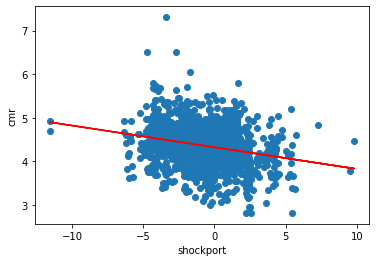

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cmr   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     40.56
Date:                Thu, 26 Mar 2020   Prob (F-statistic):           2.40e-25
Time:                        15:33:34   Log-Likelihood:                -1036.7
No. Observations:                1779   AIC:                             2081.
Df Residuals:                    1775   BIC:                             2103.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
shock           -0.0045      0.005     -0.992      0.321      -0.013       0.004
shockport       -0.0439      0.006     -7.298      0.000      -0.056      -0.032
lproxemiport     0.0342      0.012      2.832      0.005       0.011       0.058
constant         4.3283      0.011    392.112      0.000       4.307       4.350
==============================================================================
Omnibus:                       88.623   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.720
Skew:                           0.213   Prob(JB):                     5.94e-55
Kurtosis:                       4.785   Cond. No.                         3.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
'''
relationship between shockport and cmr - unique extension experimentation
'''
plt.scatter(analysisplt['shockport'], np.log(analysisplt['cmr']))
b, m = polyfit(analysisplt['shockport'], np.log(analysisplt['cmr']), 1)
plt.plot(analysisplt['shockport'], b + m * analysisplt['shockport'], '-', color='r')
plt.xlabel('shockport')
plt.ylabel('cmr')
plt.show()
a = sm.OLS(np.log(analysisplt['cmr']), analysisplt[['shock', 'shockport','lproxemiport', 'constant']], missing='drop').fit()
a.summary()

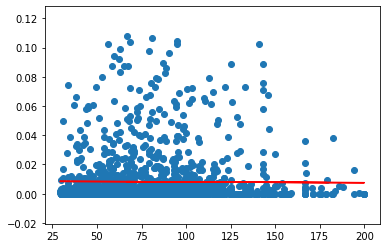

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         labor_capy0020   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1555
Date:                Thu, 05 Mar 2020   Prob (F-statistic):              0.693
Time:                        22:35:10   Log-Likelihood:                 4155.6
No. Observations:                1574   AIC:                            -8307.
Df Residuals:                    1572   BIC:                            -8297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cmr         -5.47e-06   1.39e-05     -0.394      0.693   -3.27e-05    2.17e-05
constant       0.0086      0.001      7.010      0.000       0.006       0.011
==============================================================================
Omnibus:                     1054.774   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10036.743
Skew:                           3.170   Prob(JB):                         0.00
Kurtosis:                      13.622   Cond. No.                         251.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
'''
relationship between cmr and political outcomes - unique extension experimentation
'''

plt.scatter(analysisplt['cmr'], analysisplt['labor_capy0020'])
b, m = polyfit(analysisplt['cmr'], analysisplt['labor_capy0020'], 1)
plt.plot(analysisplt['cmr'], b + m * analysisplt['cmr'], '-', color='r')
plt.show()
a = sm.OLS(analysisplt['labor_capy0020'], analysisplt[['cmr','constant']], missing='drop').fit()
a.summary()


In [66]:
'''
Table 5 - link between child mortality and shockport. Replicates 1st-stage OLS, but with child mortality instead.
'''
cmr1920 = countydum1.dropna(subset=['cmr'])
y = 'cmr'
spec1 = ['constant', 'shockport', 'shock', 'lproxemiport', 'lpop1865'] + FE
spec2 = ['constant', 'shockport', 'shock', 'lproxemiport', 'lpop1865'] + control + FE
spec3 = ['constant', 'shockport', 'shock', 'lproxemiport', 'lpop1865', 'shockport10', 'shocktown'] + control + FE
spec4 = ['constant', 'shockport', 'shock', 'lproxemiport', 'lpop1865', 'shockport10', 'shocktown', 'shockportngs', 'shockngs'] + control + FE

reg1 = sm.OLS(cmr1920[y], cmr1920[spec1]).fit(cov_type='cluster', cov_kwds={'groups': cmr1920['stnfrost']})
reg2 = sm.OLS(cmr1920[y], cmr1920[spec2]).fit(cov_type='cluster', cov_kwds={'groups': cmr1920['stnfrost']})
reg3 = sm.OLS(cmr1920[y], cmr1920[spec3]).fit(cov_type='cluster', cov_kwds={'groups': cmr1920['stnfrost']})
reg4 = sm.OLS(cmr1920[y], cmr1920[spec4]).fit(cov_type='cluster', cov_kwds={'groups': cmr1920['stnfrost']})
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3,reg4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['1: regressing labor organization on frost shocks', '2: including local controls', '3: controls for market access', '4: includes nongrowing season frost shocks'],
                            info_dict=info_dict,
                            regressor_order=['constant',
                                             'shockport',
                                             'shock',
                                             'lproxemiport',
                                             'shockport10',
                                             'shocktown',
                                             'shockportngs',
                                             'shockngs',
                                             'lproxtown',
                                             'lproxsthlm'
                                             ],
                           drop_omitted=True)
results_table.add_title('Table 3a')
results_table

,1: regressing labor organization on frost shocks,2: including local controls,3: controls for market access,4: includes nongrowing season frost shocks
constant,245.6428***,-72.3194,-65.6919,-29.2498
,(32.0321),(184.9949),(195.9546),(194.9129)
shockport,-1.4770,-1.7036**,-1.7004***,-1.9346***
,(1.0373),(0.6829),(0.5984),(0.6390)
shock,-0.2425,-0.8386**,-1.1619***,-1.6054***
,(0.5193),(0.3570),(0.4242),(0.5788)
lproxemiport,10.9997***,9.8829***,9.6566***,8.0925***
,(3.3010),(2.2670),(2.3130),(2.3145)
shockport10,,,-1.2547,-0.7241
,,,(0.8486),(0.7492)


In [78]:
'''
Table 6 - just correlating cmr with emigration.
'''

cmr1920 = countydum1.dropna(subset=['cmr'])
y = 'cmr'
spec1 = ['constant', 'emi67t', 'shock', 'lproxemiport', 'lpop1865'] + FE
spec2 = ['constant', 'emi67t', 'shock', 'lproxemiport', 'lpop1865'] + control + FE
spec3 = ['constant', 'emi67t', 'shock', 'lproxemiport', 'lpop1865', 'shockport10', 'shocktown'] + control + FE
spec4 = ['constant', 'emi67t', 'shock', 'lproxemiport', 'lpop1865', 'shockport10', 'shocktown', 'shockportngs', 'shockngs'] + control + FE

reg1 = sm.OLS(cmr1920[y], cmr1920[spec1]).fit(cov_type='cluster', cov_kwds={'groups': cmr1920['stnfrost']})
reg2 = sm.OLS(cmr1920[y], cmr1920[spec2]).fit(cov_type='cluster', cov_kwds={'groups': cmr1920['stnfrost']})
reg3 = sm.OLS(cmr1920[y], cmr1920[spec3]).fit(cov_type='cluster', cov_kwds={'groups': cmr1920['stnfrost']})
reg4 = sm.OLS(cmr1920[y], cmr1920[spec4]).fit(cov_type='cluster', cov_kwds={'groups': cmr1920['stnfrost']})
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3,reg4],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['1: regressing labor organization on frost shocks', '2: including local controls', '3: controls for market access', '4: includes nongrowing season frost shocks'],
                            info_dict=info_dict,
                            regressor_order=['constant',
                                             'emi67t',
                                             'shock',
                                             'lproxemiport',
                                             'shockport10',
                                             'shocktown',
                                             'shockportngs',
                                             'shockngs',
                                             'lproxtown',
                                             'lproxsthlm'
                                             ],
                           drop_omitted=True)
results_table.add_title('Table 3a')
results_table

,1: regressing labor organization on frost shocks,2: including local controls,3: controls for market access,4: includes nongrowing season frost shocks
constant,254.3002***,-94.7419,-91.2365,-67.9428
,(36.0548),(190.8984),(199.3168),(200.9419)
emi67t,3.2553,2.9277,2.8670,2.7755
,(2.1596),(2.1055),(2.1516),(2.2265)
shock,0.1950,-0.3709,-0.6818,-0.9348
,(0.7135),(0.4735),(0.5007),(0.5882)
lproxemiport,14.2494***,13.9565***,13.7395***,13.1471***
,(2.9818),(1.9067),(1.9034),(2.0229)
shockport10,,,-1.1910,-0.7714
,,,(0.8813),(0.7581)


In [81]:
'''
Table 7 - re-running 2nd stage OLS, this time with child mortality as outcome.
'''
countydum3c = countydum3.dropna(subset=['cmr'])
y = 'cmr'
mkt = ['shockport10', 'shocktown']
IVadds = ['shock', 'lproxemiport']
spec1 = ['constant', 'lpop1865']+FE
spec2 = ['constant', 'lpop1865']+control+FE
spec3 = ['constant', 'lpop1865']+control+FE+mkt
ols1 = sm.OLS(countydum3c[y], countydum3c[spec1+['emi67t']]).fit()
ols2 = sm.OLS(countydum3c[y], countydum3c[spec2+['emi67t']]).fit()
ols3 = sm.OLS(countydum3c[y], countydum3c[spec3+['emi67t']]).fit()
iv1 = IV2SLS(countydum3c[y], countydum3c[spec1+IVadds+['emi67t']], countydum3c[spec1+IVadds+['shockport']]).fit()
iv2 = IV2SLS(countydum3c[y], countydum3c[spec2+IVadds+['emi67t']], countydum3c[spec2+IVadds+['shockport']]).fit()
iv3 = IV2SLS(countydum3c[y], countydum3c[spec3+IVadds+['emi67t']], countydum3c[spec3+IVadds+['shockport']]).fit()

results_table = summary_col(results=[ols1,ols2,ols3,iv1,iv2,iv3],
                            float_format='%0.4f',
                            stars = True,
                            model_names=['OLS 1: with county fixed effects only', 'OLS 2: with controls', 'OLS 3: with shocks interacted with market access'
                                         , 'IV 1: with county fixed effects only', 'IV 2: with controls', 'IV 3: with shocks interacted with market access'],
                            info_dict=info_dict,
                            regressor_order=['constant',
                                             'emi67t',
                                             'shock'
                                             ],
                           drop_omitted=True)
results_table.add_title('Table 3a')
results_table

,OLS 1: with county fixed effects only,OLS 2: with controls,OLS 3: with shocks interacted with market access,IV 1: with county fixed effects only,IV 2: with controls,IV 3: with shocks interacted with market access
constant,244.7048***,142.8892,161.4043,484.3796,471.2652,-17.8710
,(14.4339),(224.9800),(226.2876),(240396104.7920),(nan),(110877736.4842)
emi67t,1.4107,1.1469,1.1280,-20.3481,-22.5912*,-22.5307*
,(1.8897),(1.9601),(1.9605),(13.6105),(13.2816),(13.3069)
shock,,,,0.1934,-0.3169,-0.6908
,,,,(0.6843),(0.7170),(0.7620)
R-squared,0.15,0.18,0.18,0.09,0.11,0.11
No. observations,1779,1779,1779,1779,1779,1779
